In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings('ignore')
#nltk.download()

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [4]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
df['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [8]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [9]:
#lets create a more easier way to undertand our rating 
def rating(review):
    if review > 3 :
        return (review,'Positive')
    else:
        return (review,'Negative')

In [10]:
df['Rating'],df['Sentiment'] = zip (*df['Rating'].apply(rating))

In [11]:
df.head(100)

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,Positive
1,ok nothing special charge diamond member hilto...,2,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,Negative
3,"unique, great stay, wonderful time hotel monac...",5,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive
...,...,...,...
95,"excellent stay staff friendly helpful, nice ho...",4,Positive
96,return going seattle booked hotel knowing budg...,4,Positive
97,terrible hotel approximately 2 weeks ago april...,1,Negative
98,great price okay experience stayed inn queen a...,3,Negative


In [12]:
df['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

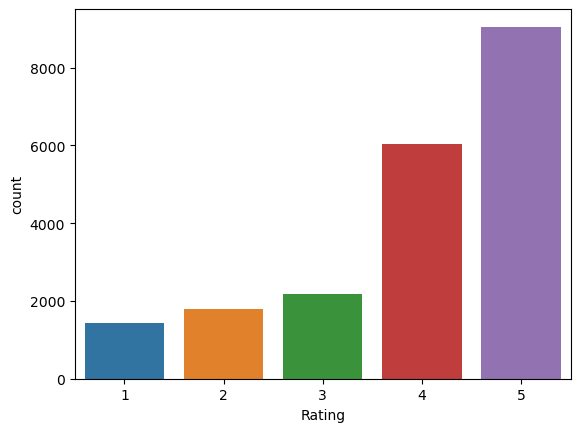

In [13]:
sns.countplot(data = df,x = 'Rating')

In [14]:
#lets check the length of each reviews.
df['lenght_of_reviews'] = df['Review'].apply(len)

In [15]:
df.head()

,Review,Rating,Sentiment,lenght_of_reviews
0,nice hotel expensive parking got good deal sta...,4,Positive,593
1,ok nothing special charge diamond member hilto...,2,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281


<Figure size 1200x600 with 0 Axes>

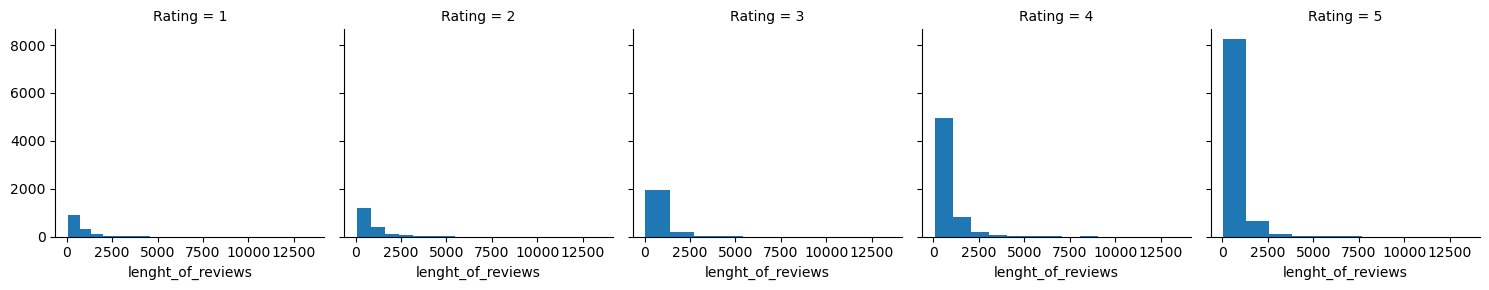

In [16]:
#using facetgrid to know lenght of review via rating 
plt.figure(figsize = (12,6))
g = sns.FacetGrid(df,col = 'Rating')
g.map(plt.hist,'lenght_of_reviews')

In [17]:
df['Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [18]:
#lets move to text processing and import necessary libraries

In [19]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from string import punctuation

In [20]:
#creating a function text_process for our text processing
def text_process(text):
    stop = stopwords.words('english')
    punc = list(punctuation)
    remove_token = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text)
    pos = pos_tag(tokens)
    word_tokens = [tok for tok in tokens if tok.isalpha()]
    clean_tokens = [lemma.lemmatize(tok.lower())for tok in word_tokens if tok not in remove_token]
    return " ".join(clean_tokens)
    

In [21]:
df.head()

,Review,Rating,Sentiment,lenght_of_reviews
0,nice hotel expensive parking got good deal sta...,4,Positive,593
1,ok nothing special charge diamond member hilto...,2,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281


In [22]:
df['Review'].head(5).apply(text_process)

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice room experience hotel monaco seattle good...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay went seahawk game awesom...
Name: Review, dtype: object

In [23]:
df['Review'] = df['Review'].apply(text_process)

In [24]:
df.head()

,Review,Rating,Sentiment,lenght_of_reviews
0,nice hotel expensive parking got good deal sta...,4,Positive,593
1,ok nothing special charge diamond member hilto...,2,Negative,1689
2,nice room experience hotel monaco seattle good...,3,Negative,1427
3,unique great stay wonderful time hotel monaco ...,5,Positive,600
4,great stay great stay went seahawk game awesom...,5,Positive,1281


In [25]:
from wordcloud import WordCloud


In [26]:
cloud = WordCloud(width= 800,
                 height= 500,
                 background_color= 'white',
                 max_font_size= 50)

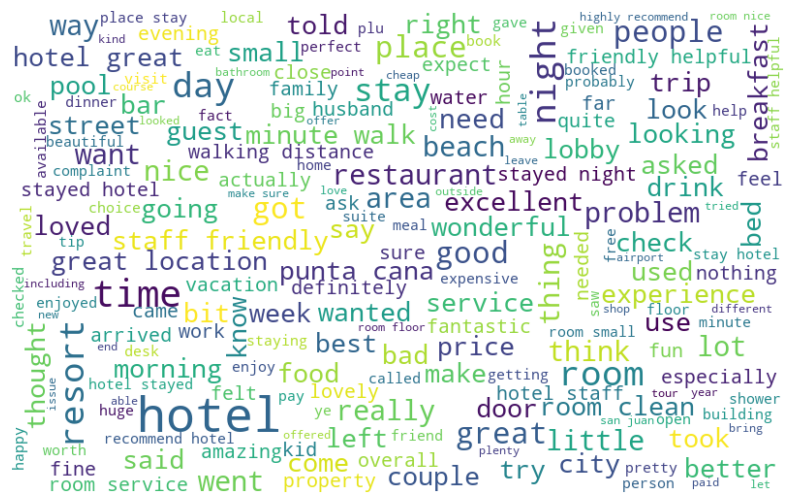

In [27]:
plt.figure(figsize = (10,10))
cloud.generate(''.join(df['Review']))
plt.imshow(cloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [28]:
df.to_csv('cleaned_data.csv',index= False)